Run the cell below if you need to install the `mplEasyAnimate` package. The [mplEasyAnimate](https://github.com/tboudreaux/mpl_animate) package was created by HPU alumnus Thomas Boudreaux.

In [ ]:
!pip install mplEasyAnimate

Import packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random as rand

## the packages below are used to create an animation as a mp4 file and display it in the notebook
from IPython.display import HTML
from mplEasyAnimate import animation
from tqdm import tqdm
from base64 import b64encode

# Agent-based Model of Wealth Distribution

We previously defined a Monte Carlo model as a description of a system based on a set of rules and random processes. In this model, we will create and study a very simple economic system that consists of 100 *agents* (i.e. persons) who initially have 10,000 dollars each. Two agents, chosen at random, conduct a transaction. They flip a coin, and the winner receives an amount of money equal to 10% of the poorer person's money. Therefore, each agent can only win or lose 10% of the poorer person's wealth.

After a long time, what does the wealth distribution look like? Will nearly everyone have close to 100,000 dollars, maybe a little more or a little less depending on their luck? Or will only a few luck individuals get nearly all of the money?

## Functions

- The `iterate()` function below calculates the money gained or lost by two agents in an interaction.
- The `runTransactions()` function runs `Ntrans` number of transactions by creating a loop and calling `iterate()` for each transaction.
- The `animTransactions()` function creates an animation. Do not create an animation for a large number of transactions because it will take a long time to create the video.

In [4]:
def iterate(N): 
    #N is the number of agents
    global wealth
    
    # pick two agents
    agent1 = rand.randint(0,N-1)
    agent2 = rand.randint(0,N-1)
    
    #if agent2 is same as agent1, pick again
    while agent2 == agent1:
        agent2 = rand.randint(0,N-1)
    
    w1 = wealth[agent1]
    w2 = wealth[agent2]
    
    if w1 < w2: #determine the amount of the transaction, dw
        dw = p*w1
    else:
        dw = p*w2
    
    #randomly pick agent to win or lose and adjust wealth
    luckyagent = rand.randint(1,2)
    if luckyagent==1:
        wealth[agent1] =  wealth[agent1] + dw
        wealth[agent2] =  wealth[agent2] - dw
    else:
        wealth[agent1] =  wealth[agent1] - dw
        wealth[agent2] =  wealth[agent2] + dw

def runTransactions(Ntrans, Nagents):
    for i in range(Ntrans):
        iterate(Nagents)
    
    fig = plt.figure(figsize=(10,8))
    plt.title("Wealth of Agents")
    plt.xlabel("Agent")
    plt.ylabel("Wealth")
    plt.bar(np.arange(1,Nagents+1), wealth, 0.5)
    plt.show()    

def animTransactions(filename, Ntrans, Nagents):
    
    with animation(filename, dpi=30) as anim:
        t_offsets = np.arange(Ntrans+1)
        i=0
        for offset in tqdm(t_offsets):

            #iterate the automata
            if i>0:
                iterate(Nagents)

            fig = plt.figure(figsize=(10,8))
            plt.title("Wealth of Agents")
            plt.xlabel("Agent")
            plt.ylabel("Wealth")
            plt.bar(np.arange(1,Nagents+1), wealth, 0.5)
            anim.add_frame(fig)
            plt.close(fig)
            i=i+1

## The Model

Define the number of agents, the initial amount of money each agent has, the percentage of the poorer person's wealth exchanged, and the total number of transactions.

At first use a small number of transactions so you can verify the model works. In the program below `Ntransactions` is set to 1. After running it, try 2, 4, 10, and 100 transactions.

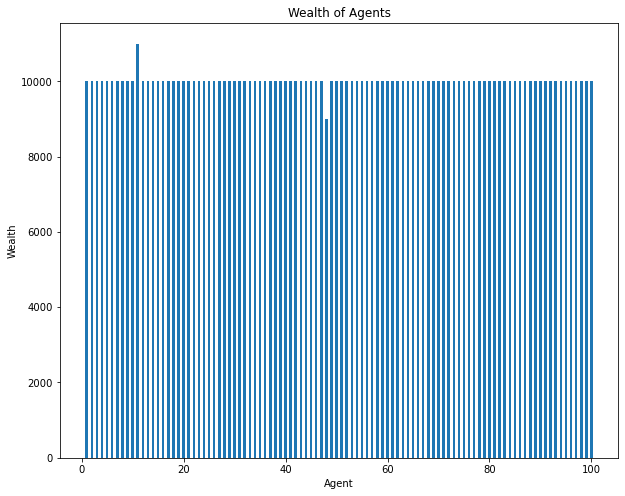

In [20]:
Nagents = 100 #number of agents
M0 = 10000 #initial amount of money for each agent
p = 0.1 #percentage of poorer agent's wealth that is exchanged
Ntransactions = 1 #total number of transactions


#an array that stores the wealth of each agent
wealth = M0*np.ones(Nagents)

#run the model
runTransactions(Ntransactions, Nagents)

## Animation

The program below creates an animation. Do not run this for a very large number of transactions because it will take a long time to create the video.

In [18]:
Nagents = 100 #number of agents
M0 = 10000 #initial amount of money for each agent
p = 0.1 #percentage of poorer agent's wealth that is exchanged
Ntransactions = 100 #total number of transactions


#an array that stores the wealth of each agent
wealth = M0*np.ones(Nagents)

filename = 'wealth-evolution.mp4'
animTransactions(filename, Ntransactions, Nagents)

#display animation
mp4 = open(filename,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

100%|██████████| 101/101 [00:24<00:00,  4.08it/s]


# Exercise 1

1. Copy and paste the program for the model below.
2. Start with 100 transactions. Then run your model with 1000 transactions and observe the result. Then run it with 10000 and 100000 transactions.

What is the outcome for a large number of transactions?

How many transactions are needed for one agent to have all the wealth? (**Note: the simulation takes approximately a minute to run for one million transactions, so you probably should not exceed one million transactions.**)

# Exercise 2

1. What is a research question we can investigate with our model?
2. Write in words how we would have to modify the program to investigate this question. It helps to think of what you would tell a programmer what to do, such as "After a transaction, the wealthier agent pays a tax that is given to the poorest of all the agents," for example. 

# Exercise 3

Investigate your research question. Ask Dr. Titus or Parker for help with code if it requires additional knowledge to implement. Compare your results to the results of the earlier model and write a summary that describes what you investigated and what you found.

## Research Question

If in a transaction, the poorer agent can win 15% of the wealthier agent's income but only lose 10% of its income, what will the wealth distribution be? Note this is like a progressive sales tax.

In [13]:
def iterate(N): 
    #N is the number of agents
    global wealth
    
    # pick two agents
    agent1 = rand.randint(0,N-1)
    agent2 = rand.randint(0,N-1)
    
    #if agent2 is same as agent1, pick again
    while agent2 == agent1:
        agent2 = rand.randint(0,N-1)
    
    w1 = wealth[agent1]
    w2 = wealth[agent2]
    
#     if w1 < w2: #determine the amount of the transaction, dw
#         dw = p*w1
#     else:
#         dw = p*w2
    
    #randomly pick agent to win or lose and adjust wealth
    luckyagent = rand.randint(1,2)
    if luckyagent==1: #agent 1 wins
        if w1 < w2: #poorer agent is the winning agent
            dw = prich*w2
        else: #wealthier agent is the winning agent
            dw = ppoor*w2
#        print("Agent 1 wins. initial wealth: w1 = {}, w2 = {}, dw = {}".format(w1,w2,dw))
        wealth[agent1] =  wealth[agent1] + dw
        wealth[agent2] =  wealth[agent2] - dw
#        print("Agent 1 wins. new wealth: w1 = {}, w2 = {}".format(wealth[agent1],wealth[agent2]))
    else: #agent 2 wins
        if w2 < w1: #poorer agent is the winning agent
            dw = prich*w1
        else: #wealthier agent is the winning agent
            dw = ppoor*w1
#        print("Agent 2 wins. initial wealth: w1 = {}, w2 = {}, dw = {}".format(w1,w2,dw))
        wealth[agent1] =  wealth[agent1] - dw
        wealth[agent2] =  wealth[agent2] + dw
#        print("Agent 2 wins. new wealth: w1 = {}, w2 = {}".format(wealth[agent1],wealth[agent2]))

def runTransactions(Ntrans, Nagents):
    for i in range(Ntrans):
        iterate(Nagents)
    
    fig = plt.figure(figsize=(10,8))
    plt.title("Wealth of Agents")
    plt.xlabel("Agent")
    plt.ylabel("Wealth")
    plt.bar(np.arange(1,Nagents+1), wealth, 0.5)
    plt.show()    

def animTransactions(filename, Ntrans, Nagents):
    
    with animation(filename, dpi=30) as anim:
        t_offsets = np.arange(Ntrans+1)
        i=0
        for offset in tqdm(t_offsets):

            #iterate the automata
            if i>0:
                iterate(Nagents)

            fig = plt.figure(figsize=(10,8))
            plt.title("Wealth of Agents")
            plt.xlabel("Agent")
            plt.ylabel("Wealth")
            plt.bar(np.arange(1,Nagents+1), wealth, 0.5)
            anim.add_frame(fig)
            plt.close(fig)
            i=i+1

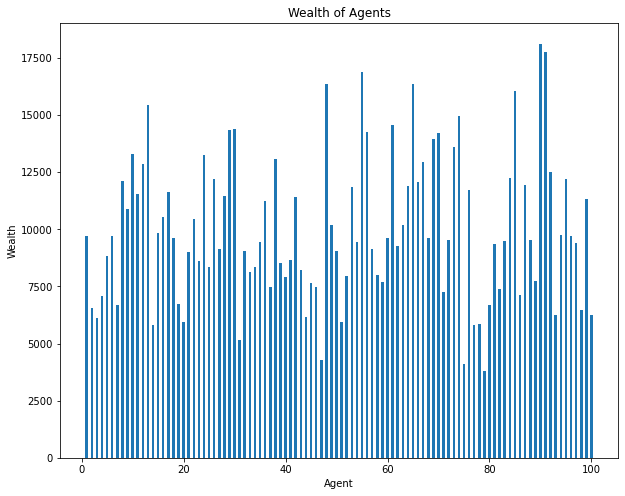

In [14]:
Nagents = 100 #number of agents
M0 = 10000 #initial amount of money for each agent
#p = 0.1 #percentage of poorer agent's wealth that is exchanged
prich = 0.15 #percentage of wealthier agent that is exchanged if poorer agent wins
ppoor = 0.1 #percentage of poorer agent that is exchanged if wealthier agent wins
Ntransactions = 1000000 #total number of transactions


#an array that stores the wealth of each agent
wealth = M0*np.ones(Nagents)

#run the model
runTransactions(Ntransactions, Nagents)